In [8]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
import plotly.io as pio 
import plotly.express as px #빠르게 사용
import plotly.graph_objects as go  #디테일하게 설정해야할때
import plotly.figure_factory as ff
from plotly.subplots import make_subplots # 여러 subplot을 그릴때 
from plotly.validators.scatter.marker import SymbolValidator # 마커사용

In [9]:
df = pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.drop('CustomerID', axis = 1, inplace= True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
for i in range(df.shape[0]) : 
    if df['Gender'].iloc[i] == 'Male' : 
        df['Gender'].iloc[i] = 0 
    else : df['Gender'].iloc[i] = 1 

df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81


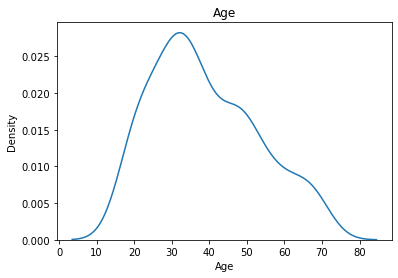

In [16]:
# Age 시각화 
x = df['Age']
sns.kdeplot(x)
plt.title('Age')
plt.show()

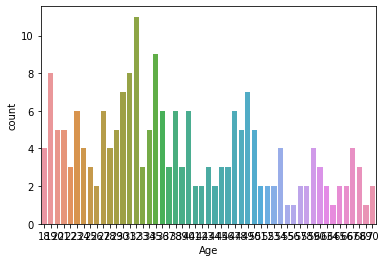

In [24]:
sns.countplot(x = df['Age'])
plt.show()

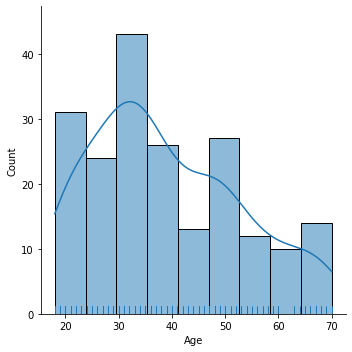

In [18]:
sns.displot(x, kde = True, rug = True)
plt.show()

# k-means 
> 파라미터 
 - 클러스터의 수 

> 확장성 
 - ...?

> 사용 케이스 
 - 일반적인 목적 
 - 고른 클러스터의 사이즈 
 - 클러스터가 별로 없을 때 

> 클러스터 기준 
 - 점들 간의 거리 

> 사용 방법
 1) 군집의 개수 k 설정 
    **설정하는 방법** 
    - Rule of Thumb : 경험 법칙 
    - Elbow Method : Cluster 간의 거리의 합을 나타내는 `inertia`가 급격히 떨어지는 구간의 K 값 
    - 정보 기준 접근법 : 
 2) 초기 centroid 설정 
    **설정하는 방법** 
    - Randomly Select 
    - Manually assign
    - `K-means+`+ : k-means의 문제점 (중심점 무작위 선정) 해결 
        1) 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 첫 번째 중심점으로 지정 
        2) 나머지 데이터 포인트들에 대해 그 **첫 번째 중심점까지의 거리 계산** 
        3) 이미 지정된 중심점으로부터 **최대한 먼 곳에 배치된 데이터포인트**를 그 다음 중심점으로 지정
        4) 중심점이 k개가 될 때가지 2,3번 반복 
 3) 데이터를 군집에 할당 : 거리 상 가장 가까운 centroid(군집)으로 할당 
 4) 중심점 재설정(갱신) : 군집에 속하는 데이터들의 가장 중간(평균)에 위치한 지점을 갱신 
 5) 데이터를 군집에 재할당(배정)
 6) 4,5 번을 중심점의 위치가 더이상 변하지 않을 때까지 반복 





# Affinity propagation
> ...란? 
 - 데이터에 대한 설명을 거의 듣지를 못해서, 진짜로 데이터 구조를 탐험부터 해야 하는 상황에서 사용하는 기법
 - 모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.


> 파라미터 
 - damping, sample preference

> K-means와 공통점 및 차이점 
- 공통점
 - 두 알고리즘 모두 클러스터 형태가 둥글어야 하는(globular) 가정이 있습니다.
 - k-means의 변형인 k-medoids와 동일하게 cluster center를 data point 자체(exemplar)를 사용합니다. 참고로 k-means는 클러스터에 속한 멤버의 평균값을 cluster center로 합니다.
- 차이점
 - AP는 k-means와 다르게 클러스터의 개수 k를 지정할 필요가 없습니다.
 - AP는 k-means와 다르게 클러스터들이 공간을 동일한 크기로 분할하는 것을 강요하지 않습니다. 참고: Visualizing the stock market structure


In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

model = AffinityPropagation(preference=-50).fit(X)

cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels, metric='sqeuclidean'))

ModuleNotFoundError: No module named 'sklearn'